In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("spam.csv",encoding="ISO-8859-1")

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
len(df)

5572

In [6]:
df.v1.unique()

array(['ham', 'spam'], dtype=object)

In [7]:
df.v1.value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [8]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [9]:
df.rename(columns={'v1':'target', 'v2':'sms'}, inplace=True)
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [10]:
df.head()

,target,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.target = df.target.map({"ham":0, "spam":1})

In [12]:
df.head()

,target,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.duplicated().sum()

403

In [14]:
df.drop_duplicates(keep="first",inplace=True)

In [15]:
df.shape

(5169, 2)

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

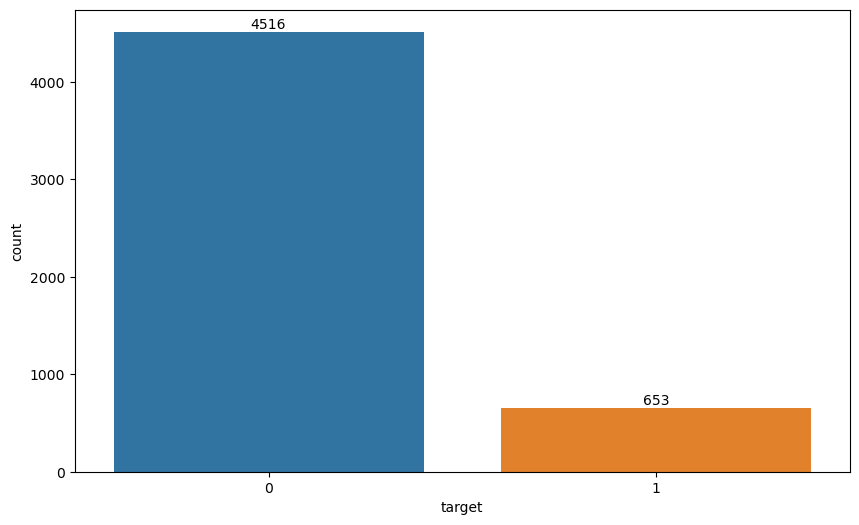

In [17]:
plt.figure(figsize=(10,6))
plot = sns.countplot(data=df,x="target")
for container in plot.containers:
    plot.bar_label(container)
plt.show()

In [18]:
X = df.sms
y = df.target

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [21]:
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([('tfidf', TfidfVectorizer()), ('classifier', MultinomialNB())])

grid_params_nb = {
    'tfidf__ngram_range': [(1,1), (1,2)],
    'tfidf__stop_words': [None, 'english'],
    'classifier__alpha': [0.01, 0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 5.0, 10.0]
}

model_nb = GridSearchCV(pipeline, grid_params_nb, cv=5, scoring='accuracy')

model_nb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('classifier', MultinomialNB())]),
             param_grid={'classifier__alpha': [0.01, 0.1, 0.5, 1.0, 1.5, 2.0,
                                               2.5, 5.0, 10.0],
                         'tfidf__ngram_range': [(1, 1), (1, 2)],
                         'tfidf__stop_words': [None, 'english']},
             scoring='accuracy')

In [22]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [23]:
y_pred = model_nb.predict(X_test)

In [24]:
accuracy = accuracy_score(y_test,y_pred)

In [25]:
accuracy

0.9800128949065119

In [26]:
cm = confusion_matrix(y_test,y_pred)

In [27]:
cm

array([[1338,    5],
       [  26,  182]], dtype=int64)

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1343
           1       0.97      0.88      0.92       208

    accuracy                           0.98      1551
   macro avg       0.98      0.94      0.96      1551
weighted avg       0.98      0.98      0.98      1551



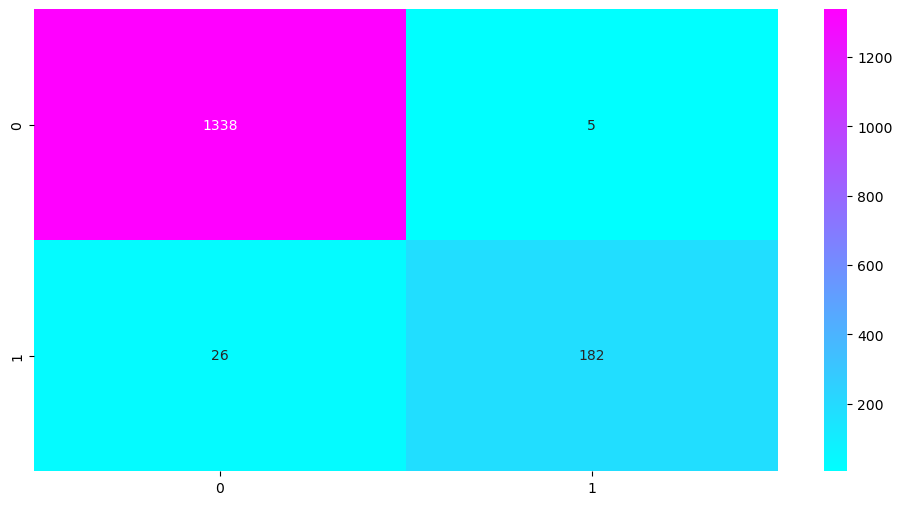

In [29]:
plt.figure(figsize=(12,6))
sns.heatmap(cm,annot=True,fmt=".0f",cmap="cool")
plt.show()